In [5]:
import pandas as pd
import glob
import os
import pathlib
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import ruptures as rpt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy import signal
import seaborn as sns

# setup matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (16, 4)
plt.rcParams['figure.dpi'] = 100

In [19]:
path_to_data_jun27 = r'D:\My Drive\Documents\DALab\Projects\3. ASE - Machine Fault Detection\Dataset\ASE_Data\4_June27_new_program'
data_jun27 = 'Test_235856.csv'

path_to_data_jun9 = r'D:\My Drive\Documents\DALab\Projects\3. ASE - Machine Fault Detection\Dataset\ASE_Data\3_June9_golden_data'
data_jun9_1 = 'Test_154223.csv'
data_jun9_2 = 'Test_154856.csv'

file_dir = os.path.join(path_to_data_jun27, data_jun27)

In [20]:
df = pd.read_csv(file_dir, index_col=0, header=None).reset_index().drop([0, 5], axis=1)

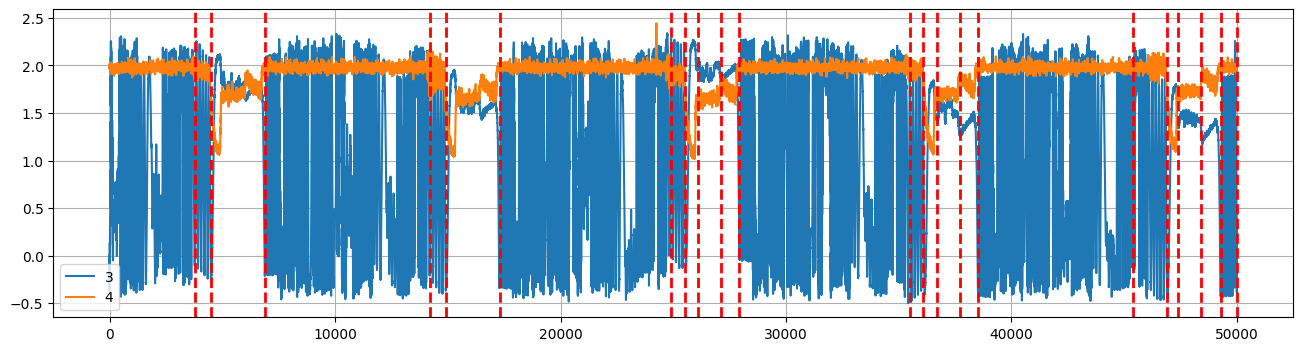

In [57]:
start, end = 250000, 300000

plt.plot(df[3][start: end].values, label='3')
plt.plot(df[4][start: end].values, label='4')

indices = [i for i in range(0, end-start, 20)]

sampling = np.take(df[4][start: end].rolling(window=100, min_periods=1).mean().values, indices)
alg_z = rpt.Pelt(model="rbf").fit(sampling)
change_loc_z = np.array(alg_z.predict(pen=10))*20
for x in change_loc_z:
    plt.axvline(x, lw=2, linestyle='--', color='r')

plt.legend()
plt.show()

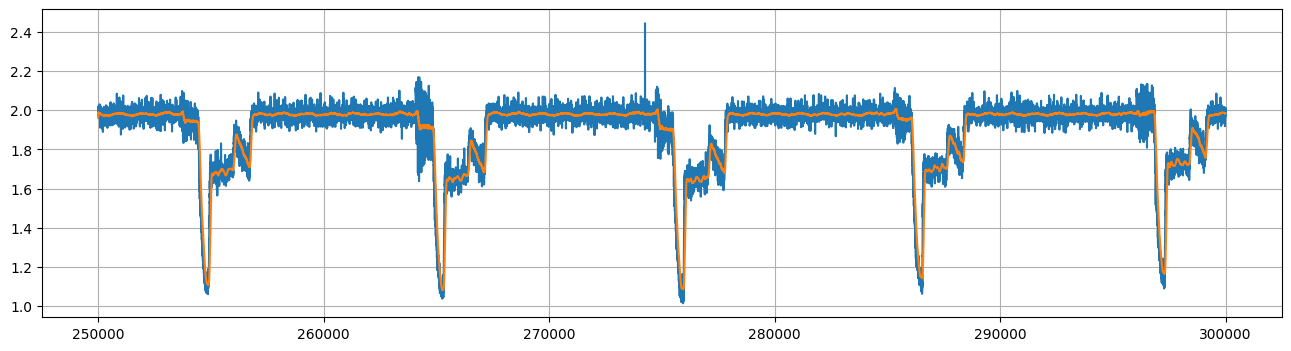

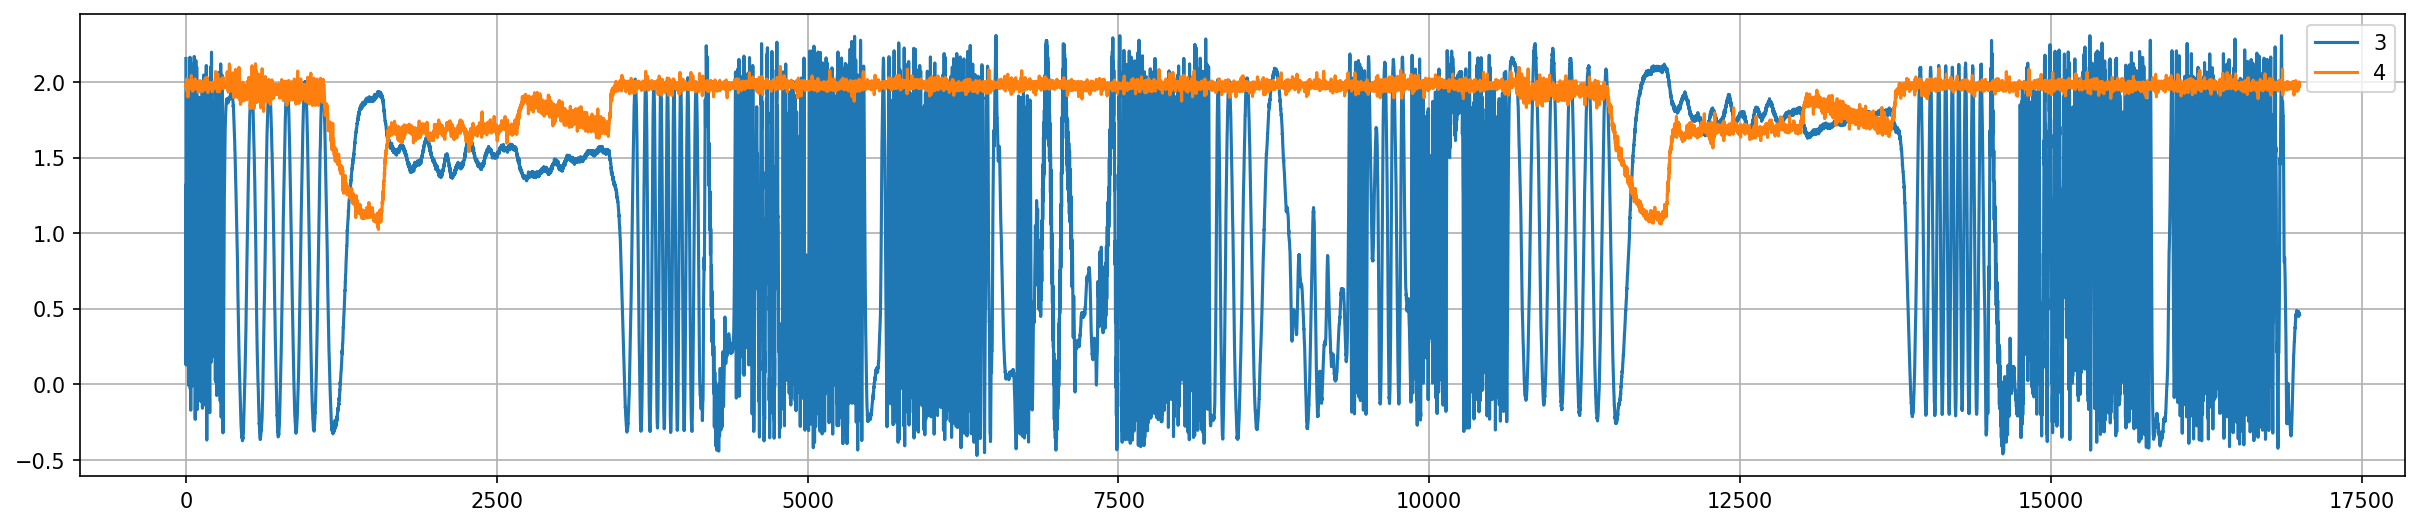

In [65]:
start, end = 243000, 260000
plt.figure(figsize=(20, 4), dpi=150)
plt.plot(df[3][start: end].values, label='3')
plt.plot(df[4][start: end].values, label='4')
plt.legend()
plt.show()

In [66]:
data = {
    'product1': {
        'id': '0001',
        'price': 100,
        'quantities': 200,
    },
    'product2': {
        'id': '0002',
        'price': 300,
        'quantities': 100,
    }
}

print(data['product1']['price'])

100
